In [13]:
# data analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sqlalchemy import create_engine
from matplotlib import style
from scipy import stats

plt.style.use('fivethirtyeight')

# data base connection imports 
import psycopg
from psycopg import sql
import os
from dotenv import load_dotenv

In [4]:
# Load environment variables from .env file
load_dotenv()

# Establish a connection to the PostgreSQL database

# Get the database credentials from environment variables
host = os.getenv("DB_HOST")
database = os.getenv("DB_NAME")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
table = os.getenv("DB_Table")
port = os.getenv("DB_PORT")

# create sqlalchemy connection
sql_engine = create_engine(f'postgresql+psycopg://{user}:{password}@{host}:{port}/{database}')

# read the table into a pandas dataframe
df = pd.read_sql_table(table, sql_engine, index_col='id')


In [5]:
nausea_inversions_mean = df.loc[df['inversions'] > 0, 'nausea'].mean()
nausea_no_inversions_mean = df.loc[df['inversions'] <= 0, 'nausea'].mean()

print(f"Mean nausea score for rides with inversions: {nausea_inversions_mean}without inversions: {nausea_no_inversions_mean} ")


Mean nausea score for rides with inversions: 4.720588235294117without inversions: 4.239814814814815 


{'whiskers': [<matplotlib.lines.Line2D at 0x23916e8dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x23916e8e180>,
 'boxes': [<matplotlib.lines.Line2D at 0x23916e8da90>,
 'medians': [<matplotlib.lines.Line2D at 0x23916e8e990>,
 'fliers': [<matplotlib.lines.Line2D at 0x23916e8ec90>,
 'means': []}

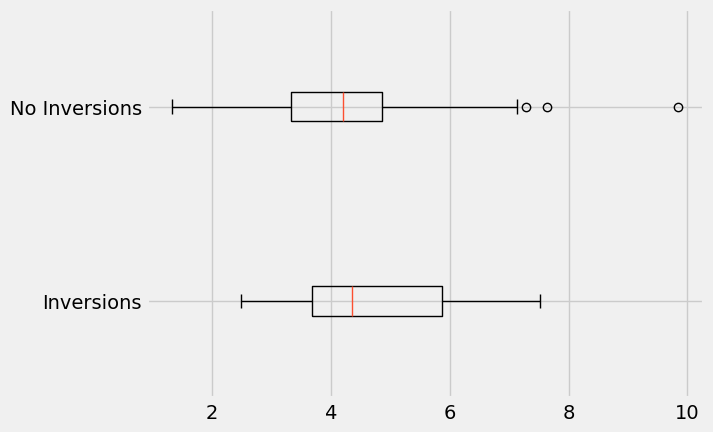

In [6]:
plt.boxplot([df.loc[df['inversions'] > 0, 'nausea'], df.loc[df['inversions'] <= 0, 'nausea']], labels=['Inversions', 'No Inversions'], vert=False)

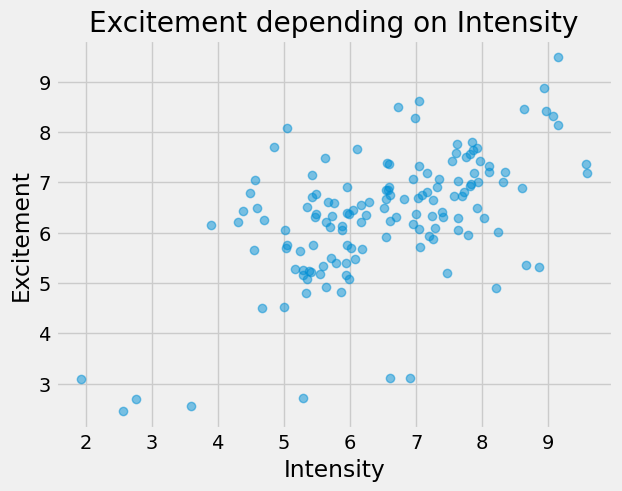

In [22]:
plt.plot(df.loc[np.abs(stats.zscore(df['intensity']) < 3), 'intensity'], df.loc[np.abs(stats.zscore(df['intensity']) < 3), 'excitement'], 'o', alpha=0.5)
plt.xlabel('Intensity')
plt.ylabel('Excitement')
plt.title('Excitement depending on Intensity')
plt.show()

In [38]:
df['intensity_rating'].unique()

array(['High', 'Very High', 'Medium', 'Low'], dtype=object)

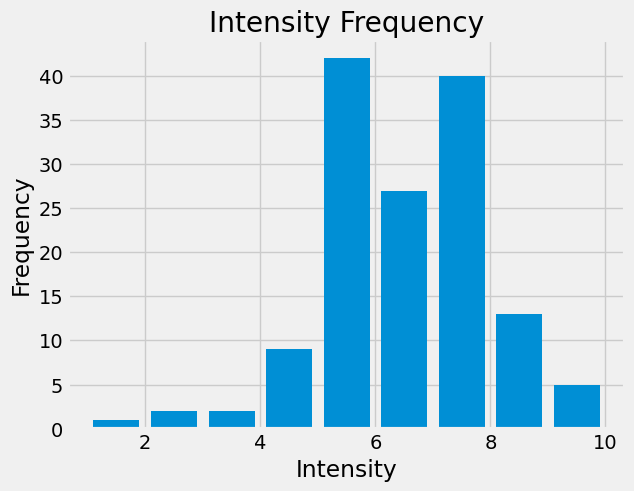

In [57]:
plt.hist(df.loc[np.abs(stats.zscore(df['intensity']) < 3), 'intensity'], np.arange(1,11),  histtype='bar', rwidth=0.8)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Intensity Frequency')
plt.show()